https://jwst-docs.stsci.edu/jwst-near-infrared-camera/nircam-performance/nircam-point-spread-functions

In [1]:
import numpy as np
from glob import glob
import os

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.patches as mpatches
#%matplotlib inline   # non-interactive (easier for notebook scrolling)
%matplotlib notebook
#plt.style.use(os.path.join(home, 'p', 'matplotlibrc.txt')) # https://matplotlib.org/tutorials/introductory/customizing.html
plt.style.use('https://www.stsci.edu/~dcoe/matplotlibrc.txt') # https://matplotlib.org/tutorials/introductory/customizing.html
mpl_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
import astropy
import astropy.io
import astropy.io.ascii
import astropy.units as u

In [4]:
cmap = matplotlib.cm.get_cmap("rainbow")

def get_filt_color(filt):
    lam = extract_lam(filt).value
    x = np.interp(lam, (0.5, 5), (0, 1))
    color = np.array(cmap(x))[:-1]
    return color

In [5]:
def extract_lam(filt):
    lam = int(filt[1:4])/100.
    return lam * u.um

# Encircled Energy

In [6]:
encircled_energy_SW = astropy.io.ascii.read('Encircled_Energy_SW.txt', header_start=3)
encircled_energy_LW = astropy.io.ascii.read('Encircled_Energy_LW.txt', header_start=3)

encircled_energy = encircled_energy_SW[:]
for label in encircled_energy_LW.columns:
    encircled_energy[label] = encircled_energy_LW[label]

encircled_energy

aperture_radius,F070W,F090W,F115W,F140M,F150W2,F150W,F162M,F164N,F182M,F187N,F200W,F210M,F212N,F250M,F277W,F300M,F322W2,F323N,F335M,F356W,F360M,F405N,F410M,F430M,F444W,F460M,F466N,F470N,F480M
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.025,0.1864,0.257,0.3168,0.3008,0.2889,0.2868,0.2664,0.2621,0.234,0.2246,0.2111,0.1922,0.1881,0.1483,0.1299,0.1115,0.1116,0.0968,0.0921,0.0859,0.0816,0.0661,0.0652,0.0595,0.0586,0.0528,0.0511,0.0501,0.0485
0.05,0.391,0.4253,0.478,0.525,0.5104,0.5314,0.5393,0.5398,0.5304,0.5249,0.5108,0.4926,0.4878,0.4355,0.3982,0.3579,0.3539,0.3209,0.3084,0.2912,0.2796,0.234,0.2312,0.2136,0.2101,0.192,0.1865,0.1829,0.1776
0.075,0.5257,0.5829,0.6155,0.5974,0.603,0.5938,0.5899,0.59,0.5955,0.5977,0.5988,0.6008,0.6007,0.6004,0.5836,0.5593,0.5473,0.5264,0.5141,0.4952,0.4838,0.4272,0.4231,0.3985,0.3919,0.3659,0.3573,0.3516,0.3429
0.1,0.5942,0.6516,0.6954,0.7102,0.6919,0.702,0.689,0.6853,0.6601,0.652,0.6439,0.6316,0.6293,0.6349,0.6408,0.6419,0.6318,0.632,0.6278,0.6186,0.6148,0.5775,0.5739,0.5531,0.5448,0.5216,0.513,0.5069,0.4971
0.2,0.7613,0.771,0.7918,0.8092,0.8021,0.8087,0.8072,0.8063,0.8073,0.809,0.8108,0.8134,0.8136,0.813,0.8054,0.7921,0.7793,0.7668,0.7561,0.7413,0.7311,0.6976,0.6966,0.6887,0.6894,0.6832,0.682,0.681,0.6793
0.3,0.8627,0.8586,0.8486,0.8504,0.8512,0.8515,0.8534,0.854,0.8568,0.8569,0.8571,0.8575,0.8577,0.8426,0.8394,0.8386,0.8379,0.8379,0.837,0.8361,0.8355,0.8307,0.8294,0.8226,0.8157,0.8061,0.8012,0.7973,0.7906
0.4,0.9057,0.9008,0.8966,0.8871,0.8887,0.8848,0.8822,0.8821,0.8803,0.8804,0.8796,0.8788,0.8785,0.8779,0.8746,0.8695,0.8655,0.8576,0.8539,0.8521,0.8491,0.8493,0.849,0.848,0.8469,0.8454,0.8448,0.8442,0.843
0.5,0.9291,0.924,0.9193,0.9144,0.9132,0.9126,0.9098,0.909,0.9021,0.9003,0.8996,0.8978,0.8973,0.8925,0.8909,0.8894,0.8869,0.8852,0.8844,0.8816,0.8812,0.8645,0.8636,0.8572,0.8593,0.8547,0.8546,0.8547,0.8549
0.6,0.9435,0.939,0.934,0.9293,0.929,0.9277,0.9252,0.9246,0.9218,0.921,0.918,0.9142,0.9132,0.9069,0.903,0.8995,0.8998,0.897,0.8971,0.8954,0.8953,0.8893,0.889,0.8867,0.883,0.8788,0.8762,0.8743,0.8716


In [7]:
filters = 'F090W F115W F150W F200W F277W F356W F410M F444W'.split()

<IPython.core.display.Javascript object>


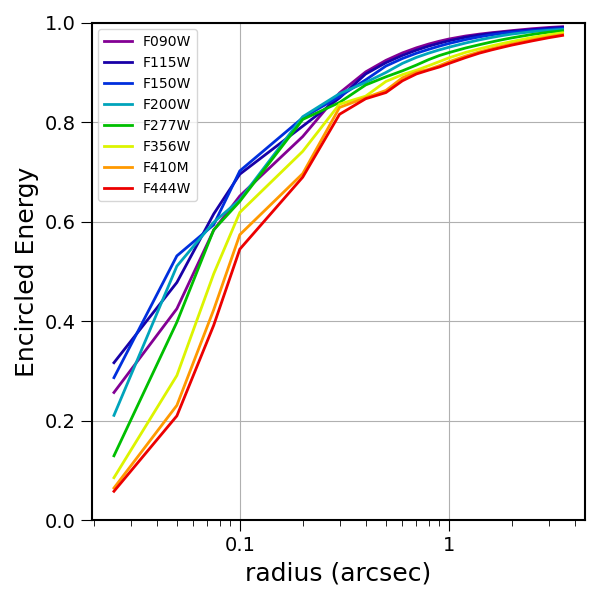

In [8]:
#plt.figure(figsize=(6, 6))
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) # , sharex=True, sharey=True)

cmap = matplotlib.cm.get_cmap("nipy_spectral")  # rainbow

for filt in filters:
    color = get_filt_color(filt)
    plt.plot(encircled_energy['aperture_radius'], encircled_energy[filt], color=color, label=filt)

plt.xlabel('radius (arcsec)')
plt.ylabel('Encircled Energy')
#plt.xlim(0, 3.5)
plt.ylim(0,1)
plt.legend()
plt.semilogx()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))

plt.grid()
plt.savefig('NIRCam_encircled_energy.png')

<IPython.core.display.Javascript object>


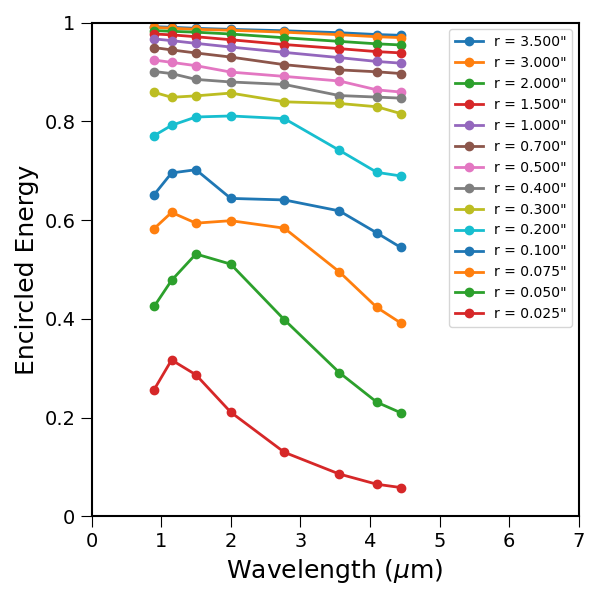

In [9]:
#plt.figure(figsize=(6, 6))
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) # , sharex=True, sharey=True)

#rr = 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3.5
rr = encircled_energy['aperture_radius']
rr = 0.025, 0.05, 0.075, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 1, 1.5, 2, 3, 3.5

for rarcsec in rr[::-1]:
    i_ee = np.argmin(np.abs(encircled_energy['aperture_radius'] - rarcsec))
    label = 'r = %.3f"' % rarcsec

    ees = []
    lams = []
    for filt in filters:
        ees.append(encircled_energy[filt.upper()][i_ee])
        lams.append(extract_lam(filt).value)

    plt.plot(lams, ees, '-o', label=label)
        
plt.xlim(0,7)
plt.ylim(0,1)
#plt.semilogy()
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))

plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Encircled Energy')
plt.legend()
plt.savefig('NIRCam_encircled_energy_8filters.png')

In [10]:
aperture_radius = 0.3
i_ee = np.argmin(np.abs(encircled_energy['aperture_radius'] - aperture_radius))
for filt in filters:
    ee = encircled_energy[filt.upper()][i_ee]
    dmag = 2.5 * np.log10(ee)
    print(filt, ' %.3f' % ee, ' %5.3f' % dmag)

F090W  0.859  -0.166
F115W  0.849  -0.178
F150W  0.852  -0.175
F200W  0.857  -0.167
F277W  0.839  -0.190
F356W  0.836  -0.194
F410M  0.829  -0.203
F444W  0.816  -0.221


# Ensquared energy

In [11]:
ensquared_energy_SW = astropy.io.ascii.read('Ensquared_Energy_SW.txt', header_start=4)
ensquared_energy_LW = astropy.io.ascii.read('Ensquared_Energy_LW.txt', header_start=4)

ensquared_energy = ensquared_energy_SW[:]
for label in ensquared_energy_LW.columns:
    ensquared_energy[label] = ensquared_energy_LW[label]

ensquared_energy['pixels_on_a_side'] = np.zeros(len(ensquared_energy)).astype(int)
for i in range(len(ensquared_energy)):
    ensquared_energy['pixels_on_a_side'][i] = int(ensquared_energy['aperture_size'][i].split('x')[0])

#ensquared_energy.columns = list(ensquared_energy.columns[-1:]) + list(ensquared_energy.columns[:-1])
ensquared_energy

aperture_size,F070W,F090W,F115W,F140M,F150W2,F150W,F162M,F164N,F182M,F187N,F200W,F210M,F212N,F250M,F277W,F300M,F322W2,F323N,F335M,F356W,F360M,F405N,F410M,F430M,F444W,F460M,F466N,F470N,F480M,pixels_on_a_side
str7,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
1x1,0.1308,0.1758,0.2001,0.1766,0.1723,0.1658,0.1503,0.1472,0.1286,0.1226,0.1145,0.1029,0.1005,0.2748,0.2438,0.212,0.2114,0.1858,0.1773,0.1659,0.158,0.1292,0.1275,0.1168,0.1149,0.1041,0.1008,0.0987,0.0957,1
2x2,0.2586,0.3236,0.4167,0.4365,0.4145,0.427,0.4124,0.4087,0.3784,0.3675,0.3496,0.3251,0.3195,0.5849,0.5629,0.534,0.5231,0.4986,0.4856,0.4661,0.4541,0.3974,0.3934,0.3693,0.3632,0.3379,0.3297,0.3242,0.316,2
3x3,0.4029,0.4379,0.4873,0.5293,0.5181,0.5365,0.5457,0.5466,0.541,0.5369,0.5245,0.5088,0.5045,0.6412,0.6452,0.646,0.6391,0.6393,0.6366,0.6303,0.6281,0.5985,0.5953,0.5772,0.5691,0.5486,0.5407,0.5349,0.5255,3
5x5,0.5599,0.6217,0.6594,0.6523,0.6459,0.6435,0.6314,0.6292,0.62,0.6179,0.6165,0.6141,0.6135,0.7865,0.7652,0.7401,0.7389,0.7152,0.7081,0.701,0.6946,0.6831,0.683,0.6813,0.6803,0.6791,0.6784,0.6772,0.6747,5
7x7,0.6366,0.6857,0.7243,0.7451,0.7347,0.7461,0.7463,0.7455,0.7312,0.7249,0.7126,0.6961,0.6922,0.83,0.8282,0.8258,0.8189,0.8189,0.8147,0.8059,0.802,0.7695,0.7669,0.7512,0.7477,0.7314,0.7263,0.723,0.718,7
9x9,0.6949,0.729,0.7571,0.7749,0.7716,0.7786,0.7834,0.7842,0.7862,0.7862,0.7822,0.7774,0.7758,0.8505,0.8471,0.8439,0.8439,0.8411,0.8403,0.8394,0.8389,0.8335,0.8324,0.8265,0.8213,0.8135,0.8097,0.8066,0.8012,9
11x11,0.7481,0.7634,0.7858,0.7978,0.7961,0.8,0.8033,0.8042,0.8076,0.8081,0.8076,0.8073,0.807,0.875,0.8681,0.8604,0.8618,0.8557,0.8546,0.853,0.852,0.8476,0.8474,0.8459,0.8448,0.8433,0.8425,0.8417,0.8398,11
13x13,0.7975,0.7964,0.8071,0.8205,0.8163,0.8217,0.8228,0.8225,0.8226,0.8231,0.8238,0.8247,0.8248,0.8872,0.8848,0.8815,0.8779,0.8744,0.8713,0.868,0.8651,0.8588,0.8585,0.8562,0.8556,0.8533,0.8526,0.8521,0.8512,13
15x15,0.8345,0.8262,0.8274,0.8351,0.834,0.8376,0.841,0.8416,0.8404,0.8392,0.8382,0.8367,0.8366,0.8959,0.8942,0.8921,0.8902,0.8899,0.8884,0.8846,0.883,0.8708,0.8702,0.8665,0.8665,0.8632,0.8625,0.862,0.8613,15


<IPython.core.display.Javascript object>


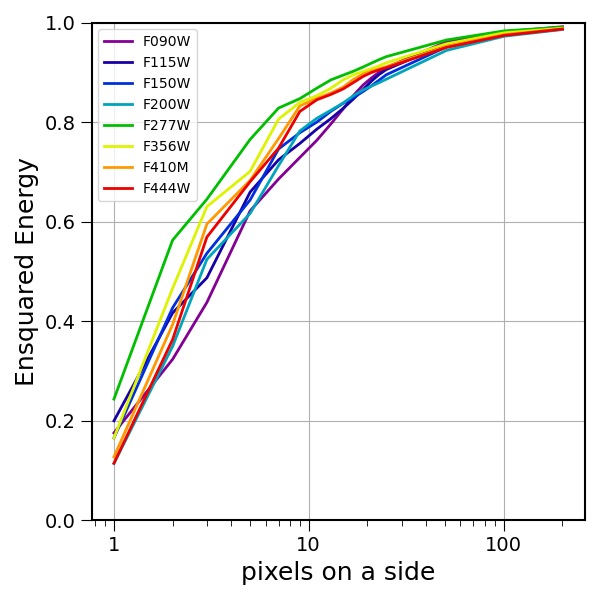

In [12]:
#plt.figure(figsize=(6, 6))
fig, ax = plt.subplots(1, 1, figsize=(6, 6)) # , sharex=True, sharey=True)

cmap = matplotlib.cm.get_cmap("nipy_spectral")  # rainbow

for filt in filters:
    color = get_filt_color(filt)
    plt.plot(ensquared_energy['pixels_on_a_side'], ensquared_energy[filt], color=color, label=filt)

plt.xlabel('pixels on a side')
plt.ylabel('Ensquared Energy')
#plt.xlim(0,1)  # 3.5
plt.semilogx()
plt.ylim(0,1)
plt.legend()
plt.grid()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
#ax.xaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))

#plt.savefig('NIRCam_ensquared_energy_vs_size.png')

<IPython.core.display.Javascript object>


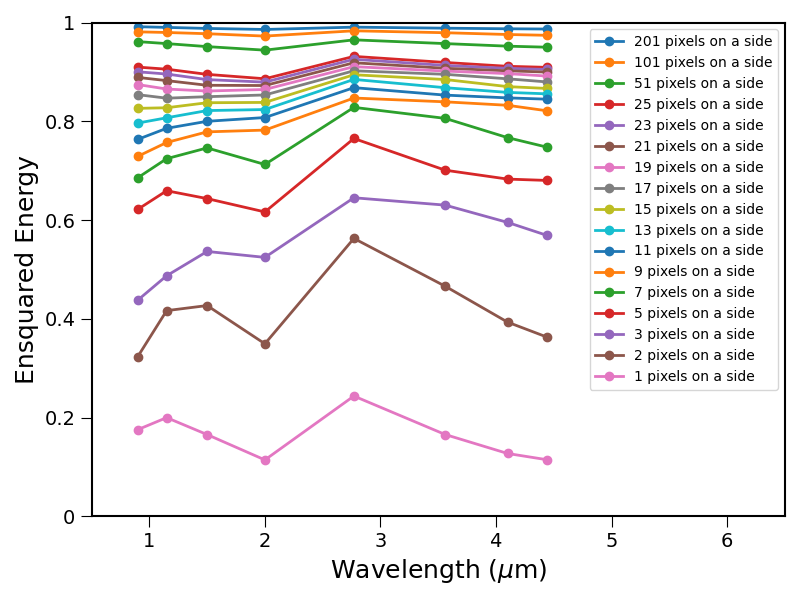

In [13]:
#plt.figure(figsize=(6, 6))
fig, ax = plt.subplots(1, 1, figsize=(8, 6)) # , sharex=True, sharey=True)

pp = ensquared_energy['pixels_on_a_side'][::-1]

for pixels_on_a_side in pp:
    i_ee = np.argmin(np.abs(ensquared_energy['pixels_on_a_side'] - pixels_on_a_side))
    label = '%d pixels on a side' % pixels_on_a_side

    ees = []
    lams = []
    for filt in filters:
        ees.append(ensquared_energy[filt.upper()][i_ee])
        lams.append(extract_lam(filt).value)

    plt.plot(lams, ees, '-o', label=label)
        
plt.xlim(0.5,6.5)
plt.ylim(0,1)
#plt.semilogy()
#plt.ylim(0.47, 1)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%g"))
ax.yaxis.set_minor_formatter(ticker.FormatStrFormatter("%g"))

plt.xlabel('Wavelength ($\mu$m)')
plt.ylabel('Ensquared Energy')
plt.legend()
#plt.savefig('NIRCam_ensquared_energy_8filters.png')

In [14]:
pixels_on_a_side = 5
i_ee = np.argmin(np.abs(ensquared_energy['pixels_on_a_side'] - pixels_on_a_side))
for filt in filters:
    ee = ensquared_energy[filt.upper()][i_ee]
    dmag = 2.5 * np.log10(ee)
    print(filt, ' %.3f' % ee, ' %5.3f' % dmag)

F090W  0.622  -0.516
F115W  0.659  -0.452
F150W  0.643  -0.479
F200W  0.617  -0.525
F277W  0.765  -0.291
F356W  0.701  -0.386
F410M  0.683  -0.414
F444W  0.680  -0.418
